In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 46.3 MB 13.4 MB/s 
     |████████████████████████████████| 190 kB 7.8 MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 23858, done.
remote: Total 23858 (delta 0), reused 0 (delta 0), pack-reused 23858
Receiving objects: 100% (23858/23858), 35.45 MiB | 32.12 MiB/s, done.
Resolving deltas: 100% (16670/16670), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Running setup.py develop for mmdet
     |████████████████████████████████| 2.1 MB 8.3 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 7.0.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -rvi  /content/drive/MyDrive/20220314_093733.log /content/mmdetection/checkpoints
!cp -rvi /content/drive/MyDrive/20220314_093733.log.json /content/mmdetection/checkpoints
!cp -rvi /content/drive/MyDrive/iter_90000.pth /content/mmdetection/checkpoints
#!cp -rvi /content/drive/MyDrive/latest.pth /content/mmdetection/checkpoints

'/content/drive/MyDrive/20220314_093733.log' -> '/content/mmdetection/checkpoints/20220314_093733.log'
'/content/drive/MyDrive/20220314_093733.log.json' -> '/content/mmdetection/checkpoints/20220314_093733.log.json'
'/content/drive/MyDrive/iter_90000.pth' -> '/content/mmdetection/checkpoints/iter_90000.pth'


In [3]:
%cd mmdetection

/content/mmdetection


In [4]:
!python tools/misc/download_dataset.py --unzip

Streaming output truncated to the last 5000 lines.


 46% 2.86G/6.19G [01:06<01:11, 49.7MB/s]
 17% 2.99G/18.0G [01:06<05:33, 48.3MB/s]


 46% 2.87G/6.19G [01:06<01:11, 49.9MB/s]
 17% 2.99G/18.0G [01:06<05:23, 49.8MB/s]


 46% 2.87G/6.19G [01:06<01:11, 50.0MB/s]
 17% 3.00G/18.0G [01:06<05:32, 48.5MB/s]


 47% 2.88G/6.19G [01:06<01:11, 49.9MB/s]
 17% 3.00G/18.0G [01:06<05:33, 48.3MB/s]


 47% 2.89G/6.19G [01:06<01:11, 49.9MB/s]
 17% 3.01G/18.0G [01:06<05:24, 49.6MB/s]
 17% 3.01G/18.0G [01:06<05:32, 48.4MB/s]


 47% 2.89G/6.19G [01:06<01:11, 49.7MB/s]
 17% 3.02G/18.0G [01:06<05:28, 49.0MB/s]


 47% 2.90G/6.19G [01:06<01:10, 49.8MB/s]
 17% 3.02G/18.0G [01:07<05:23, 49.7MB/s]


 47% 2.90G/6.19G [01:07<01:11, 49.6MB/s]
 17% 3.03G/18.0G [01:07<05:26, 49.2MB/s]


 47% 2.91G/6.19G [01:07<01:10, 49.8MB/s]
 17% 3.03G/18.0G [01:07<05:28, 49.0MB/s]


 47% 2.91G/6.19G [01:07<01:11, 49.5MB/s]
 17% 3.04G/18.0G [01:07<05:26, 49.2MB/s]
 17% 3.04G/18.0G [01:07<05:28, 48.9MB/s]


 47% 2.92G/6.19G [01:07<0

In [6]:
!python tools/train.py '/content/mmdetection/configs/fcos/fcos_r50_caffe_fpn_gn-head_1x_coco_90k.py' --resume-from /content/mmdetection/checkpoints/iter_90000.pth

/content/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-29 05:56:57,657 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1.TC455_06.29190527_0
GC

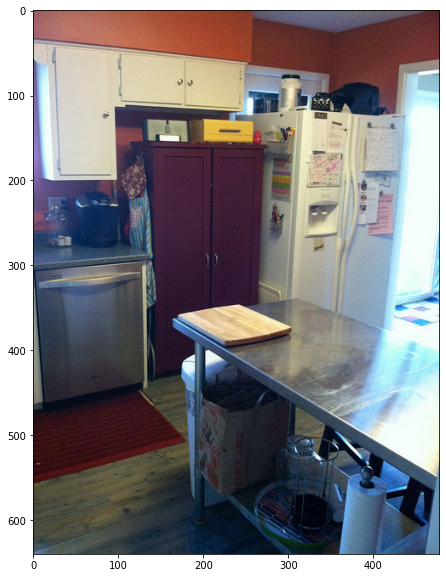

In [22]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/COCO_train2014_000000111103.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [12]:
from mmdet.apis import inference_detector, show_result_pyplot,init_detector
config_file='/content/mmdetection/configs/fcos/fcos_r50_caffe_fpn_gn-head_1x_coco_90k.py'
checkpoint_path='/content/mmdetection/work_dirs/fcos_r50_caffe_fpn_gn-head_1x_coco_90k/iter_90000.pth'
model = init_detector(config_file, checkpoint_path,device='cuda:0')

load checkpoint from local path: /content/mmdetection/work_dirs/fcos_r50_caffe_fpn_gn-head_1x_coco_90k/iter_90000.pth


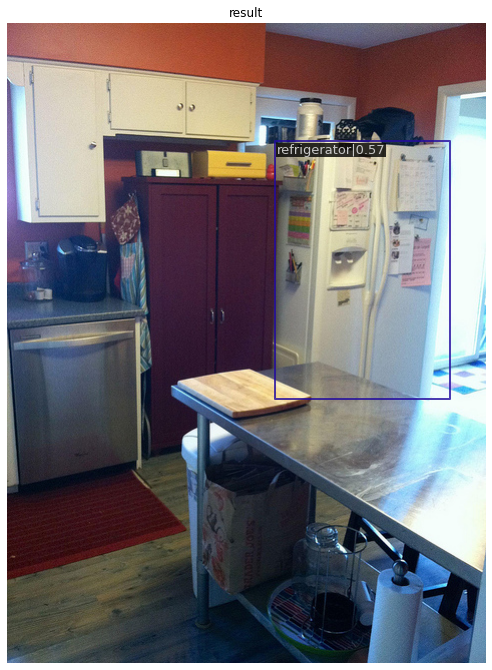

In [23]:
result=inference_detector(model,img)
show_result_pyplot(model,img,result)